In [16]:
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
s2_spectral_response_function_download_link = "https://sentiwiki.copernicus.eu/__attachments/1692737/COPE-GSEG-EOPG-TN-15-0007%20-%20Sentinel-2%20Spectral%20Response%20Functions%202024%20-%204.0.xlsx?inst-v=59ac1eb3-61c9-4626-b824-7509bfd7c905"
s2_spectral_response_function_file = "COPE-GSEG-EOPG-TN-15-0007 - Sentinel-2 Spectral Response Functions 2024 - 4.0.xlsx"

if s2_spectral_response_function_file not in os.listdir():
    urllib.request.urlretrieve(s2_spectral_response_function_download_link, s2_spectral_response_function_file)

In [10]:
sfr = pd.DataFrame(pd.read_excel(s2_spectral_response_function_file, sheet_name="Spectral Responses (S2A)"))
sfr.head()

/home/romain/anaconda3/envs/ml/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,SR_WL,S2A_SR_AV_B1,S2A_SR_AV_B2,S2A_SR_AV_B3,S2A_SR_AV_B4,S2A_SR_AV_B5,S2A_SR_AV_B6,S2A_SR_AV_B7,S2A_SR_AV_B8,S2A_SR_AV_B8A,S2A_SR_AV_B9,S2A_SR_AV_B10,S2A_SR_AV_B11,S2A_SR_AV_B12
0,300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sfr = sfr.to_numpy()
wv, sfr = sfr[:, 0], sfr[:, 1:]

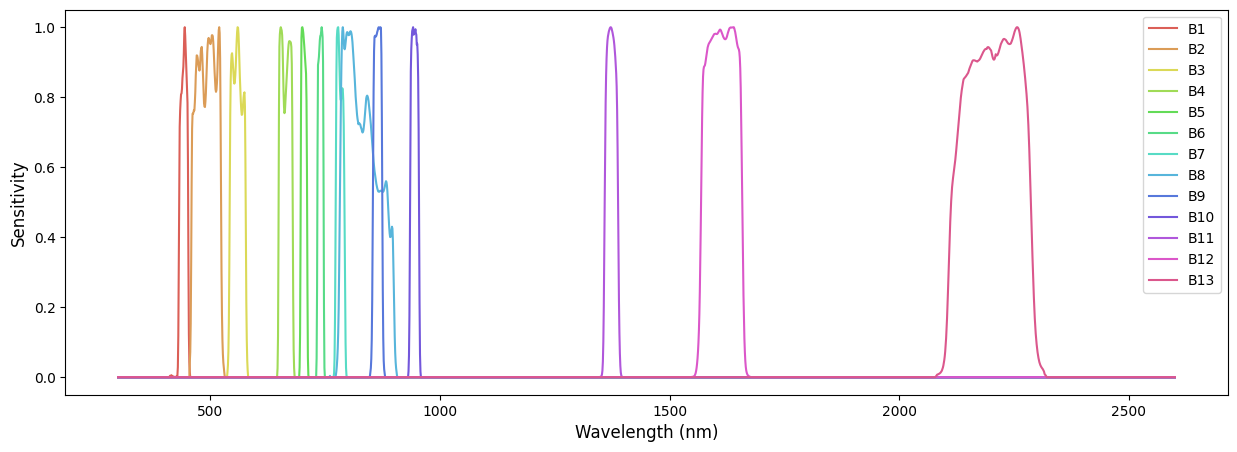

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
colors = sns.color_palette("hls", sfr.shape[1])
fontsize = 12
for band in range(sfr.shape[1]):
    plt.plot(wv, sfr[:, band], color=colors[band], label=f'B{band+1}')
plt.legend()
plt.xlabel('Wavelength (nm)', fontsize=fontsize)
plt.ylabel('Sensitivity', fontsize=fontsize)
plt.show()